# Capstone Webscrapping using BeautifulSoup

This project aims to answer and visualize the top 7 most popular movie in the `imdb` website. The visualization used is a simple fashboard using Flask library. In this notebook the steps and method will be presented from scraping data, finding `tags`, data wranggling and visualization.


This following requirement for running this code:
- Install `beautifulSoup4`
- Install `pandas`
- Install `flask`
- Install `matplotlib`



Before getting a request from the website, we should import `requests` first. Then, get the request to the website using `requests.get()`

In [2]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

When the request work , we can see use `.content`. Then, slice it to get better visualization of html code from the page and we can also see full of html code.

In [3]:
url_get.content[0:1000]

b'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\

In the code below we use beatifulsoup to extract a bunch of html line codes into something readible and structured.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


To peek the html that we run, we can do printing equal to 1000 characters



In [5]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

In this step we need to find key tags and put the key into `.find()`  To find the key from the website, we should use inspecte element html from our browser. Select any particular information from the webpage, then see the tags such as `div`, `span` or `class`.

In out project  we are going to get an information from Imdb webpage. So, after we inspect html we found `div` with `attrs={'class':'article'}` to extract the information we want. 

In [6]:
main_webpage = soup.find('div', attrs={'class':'article'})
print(main_webpage.prettify()[:1000])

<div class="article">
 <h1 class="header">
  Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending)
 </h1>
 <div class="nav">
  <br class="clear"/>
  <div class="display-mode float-right">
   View Mode:
   <a class="compact" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;view=simple">
    Compact
   </a>
   <span class="ghost">
    |
   </span>
   <a class="detailed" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;view=advanced">
    <strong>
     Detailed
    </strong>
   </a>
  </div>
  <div class="desc">
   <span>
    1-50 of 325,324 titles.
   </span>
   <span class="ghost">
    |
   </span>
   <a class="lister-page-next next-page" href="/search/title/?release_date=2019-01-01,2019-12-31&amp;start=51">
    Next »
   </a>
  </div>
 </div>
 <br class="clear"/>
 <div class="sorting">
  Sort by:
  <a href="/search/title/?release_date=2019-01-01,2019-12-31&amp;sort=moviemeter,desc">
   <strong>
    Popularity
   </strong>
   ▲
  </a>
  <span 

Before we are going to catch the specific information from each movie, we should to try catch the second_information tag first. Let's check the code below:

- Using `find_all()` for getting the all information from html which located in `div` tag with `attrs={'class':'lister-item-content'}`
- Slicing the `box_movie` object for getting 0 index value

In [7]:
box_movie = soup.find_all('div', attrs={'class':'lister-item-content'})
box_movie[2]

<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">3.</span>
<a href="/title/tt8946378/">Knives Out</a>
<span class="lister-item-year text-muted unbold">(2019)</span>
</h3>
<p class="text-muted">
<span class="certificate">17+</span>
<span class="ghost">|</span>
<span class="runtime">130 min</span>
<span class="ghost">|</span>
<span class="genre">
Comedy, Crime, Drama            </span>
</p>
<div class="ratings-bar">
<div class="inline-block ratings-imdb-rating" data-value="7.9" name="ir">
<span class="global-sprite rating-star imdb-rating"></span>
<strong>7.9</strong>
</div>
<div class="inline-block ratings-user-rating">
<span class="userRatingValue" data-tconst="tt8946378" id="urv_tt8946378">
<span class="global-sprite rating-star no-rating"></span>
<span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
</span>
<div class="starBarWidget" id="sb_tt8946378">
<div class="rating rating-list

This code below is used to scrap all information that we need. 

- First of all we make us of  iteration to loop `box_webpage` with `div` tags and `attrs={'class':'lister-item-content'}`. The extract the title of the movie by using daframe  box_webpage, by adding `.text` with `a` tags. 

The same applies to `title_movie`, `rating_movie`,`metascore_movie, and `movie_votes`, where we use their unique tags and add `text`

- However, `metascore_movie` it's a little bit diffent then the other three category. Here we use the logical statements  `if-else` because there are several movies do not have a metascore information. Thus, if the `metascore_movie` is None it will return None Value. Otherwise, it will return metascore.

In [8]:
temp = []

for i in range(0, len(box_movie)):
    box_webpage = main_webpage.find_all('div', attrs={'class':'lister-item-content'})[i]
    
    #Get Title
    title_movie = box_webpage.find_all('a')[0].text

    #Get Rating
    rating_movie = box_webpage.find_all('strong')[0].text

    #Get Metascore
    metascore_movie = box_webpage.find('span', attrs={'class':'metascore favorable'})
    if metascore_movie is not None:
        metascore_movie = metascore_movie.text.strip()
    else:
        metascore_movie = None
        
    #Get Movie Votes
    movie_votes = box_webpage.find_all('span', attrs={'name':'nv'})[0].text

    temp.append((title_movie,rating_movie,metascore_movie,movie_votes))

temp[0]

('The Umbrella Academy', '8.0', None, '116,527')

Check the number of `temp` ! It should consists of elements

In this part we finally establish our dataframe where we use `colums` to tidy up information into a table.

In [9]:
import pandas as pd

dataset_movie = pd.DataFrame(temp, columns = ('Title_Movie', 'Imdb_Rating', 'Metascore', 'Movie_Votes'))
dataset_movie.head()

,Title_Movie,Imdb_Rating,Metascore,Movie_Votes
0,The Umbrella Academy,8.0,None,"116,527"
1,The Boys,8.7,None,"158,086"
2,Knives Out,7.9,82,"363,924"
3,Jojo Rabbit,7.9,None,"245,334"
4,Doom Patrol,8.0,None,"28,785"


Check the types of the column first using `.dtypes` for getting the data types information in each column

In [10]:
dataset_movie.dtypes

Title_Movie    object
Imdb_Rating    object
Metascore      object
Movie_Votes    object
dtype: object

In this part we do data wrangling. First i use the `lambda` function to replace the `,` in `Movie_Votes` into  `.`. This is because we later on want to convert `Movie_Votes` into `float64`.

we use `pd.to_numeric` to also convert `Metascore` into `float` while also using `errors=coerce` to coerce any error value in `Metascore`

In [11]:
dataset_movie['Movie_Votes'] = dataset_movie['Movie_Votes'].apply(lambda x: x.replace(',','.'))
dataset_movie['Metascore'] = pd.to_numeric(dataset_movie['Metascore'], errors='coerce')
dataset_movie[['Imdb_Rating','Movie_Votes']] = dataset_movie[['Imdb_Rating','Movie_Votes']].astype('float64')

Here we do a last final check that the right datatypes is used.

In [12]:
dataset_movie.dtypes

Title_Movie     object
Imdb_Rating    float64
Metascore      float64
Movie_Votes    float64
dtype: object

In this code below we are going to use bar plot to visualize the Top 7 Movies, by looking at the amount of votes given by viewers.

As the project question is about finding popularity, i use the sort_values attribute to sort data frame based on Movie_Votes.

AxesSubplot(0.125,0.125;0.775x0.755)


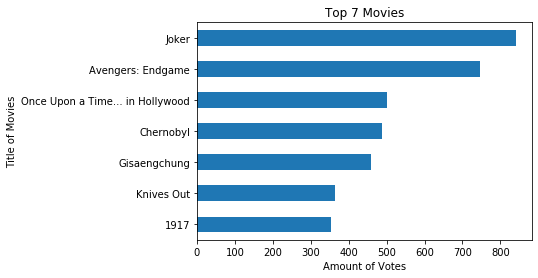

In [13]:
import matplotlib.pyplot as plt

top_7movie = dataset_movie.sort_values(by=['Movie_Votes'], ascending=False).head(7)

top_7movie = top_7movie.set_index('Title_Movie')

ax = top_7movie['Movie_Votes'].sort_values(ascending=True).plot(kind='barh', title='Top 7 Movies')
ax.set_xlabel('Amount of Votes')
ax.set_ylabel("Title of Movies")

print(ax)